In [31]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('/Users/shubham/MachineLearning/AMLP/datasets/winequality-red.csv')

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
mapping_quality = {3:0,
                   4:1,
                   5:2,
                   6:3,
                   7:4,
                   8:5}

In [35]:
df['quality'] = df['quality'].map(mapping_quality)

In [36]:
df['quality'].value_counts()

quality
2    681
3    638
4    199
1     53
5     18
0     10
Name: count, dtype: int64

In [37]:
df = df.sample(frac=1).reset_index(drop=True)

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.0,0.28,0.49,1.9,0.074,10.0,21.0,0.99760,2.98,0.66,9.9,4
1,10.2,0.36,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5,3
2,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,2
3,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,3
4,7.5,0.58,0.03,4.1,0.080,27.0,46.0,0.99592,3.02,0.47,9.2,2


In [39]:
df_train = df.head(1000)
df_test = df.tail(599)

In [40]:
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth=7)

In [41]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [42]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [43]:
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [44]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [45]:
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)


In [46]:
print(f'Training accuracy : {train_accuracy}')
print(f'Test accuracy : {test_accuracy}')

Training accuracy : 0.772
Test accuracy : 0.5592654424040067


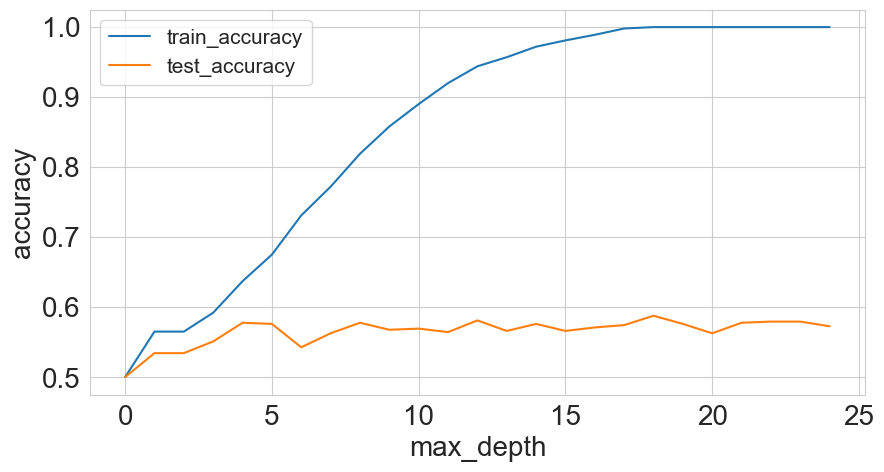

In [47]:
from sklearn import tree
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
%matplotlib inline



train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1,25):
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    cols =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
    clf.fit(df_train[cols], df_train.quality)
    train_predictions=clf.predict(df_train[cols])
    test_predictions=clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(df_train.quality , train_predictions)
    test_accuracy=metrics.accuracy_score(df_test.quality, test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies , label="train_accuracy")
plt.plot(test_accuracies , label="test_accuracy")
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

## This means that our simple decision tree model keeps learnining about the training data better and better with an increase in max_depth , but the performance in test data does not improve at all. This is called OVERFITTING

## This means that the model will learn the training data well but will not generalize the unseen test samples

## IN case of Neural networks , while training we must monitor loss during training time both for train and test sets .

## We must stop traininig where the validation loss reaches its minimum.

*******************************************************************************************************************************************************************************

# CROSS VALIDATION

- kfold cross validation
- stratified k fold cross validation
- hold out based cross validation
- group k fold cross validation

Cross validation is dividing trainining data into few parts.
We train the model on some of the parts and test on the remaining parts

We divide the data into k different sets and the targets associated with it which are exclusive of each other. - This is k fold cross validation.


In [48]:
# Importing pandas and model_selection module of scikit learn
import pandas as pd
from sklearn import model_selection

In [49]:
import pandas as pd
from sklearn import model_selection

In [51]:
if __name__ == "__main__":
    df=pd.read_csv('train.csv')
    df["kfold"] = -1
    df = dfs.sample(frac=1).reset_index(drop=True)
    
    kf = model_selection.kFold(n_splits=5)
    for fold, (trn_,val_) in enumerate(kf.split(X=df)):
        df.loc[val_,'kfold'] = fold
    
    df.to_csv("train_folds.csv",index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'